In [2]:
# Initial Imports for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.precision", 3)

In [3]:
# Read csv
flights_data = pd.read_csv("flights.csv")
# Check interpreted data types of the columns. We see that it uses a whooping 48mb in memory
flights_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [4]:
# Preliminary data check on columns
flights_data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T14:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30T22:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T12:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T11:00:00Z


In [5]:
"""EDA Task"""
print(f'Before EDA {flights_data.shape}')
# We remove columns that are not required that include year, month, day distance, minute,time_hour,tail_num. Won't be contained in our analysis
flights_data.drop(["year", "day","distance", "time_hour","tailnum"], axis=1, inplace=True)
print(f'Zero purge (Column Check): {flights_data.shape}')

# We remove all null depature delay times. Not helpful for analysis
flights_data = flights_data[flights_data[["dep_delay", "arr_delay"]].notna().all(axis=1)]
print(f'First purge (Null Check): {flights_data.shape}')

# We remove outliers from our data, any value more than 3 standard deviations away from the mean of dep_delay or arr_delay columns eliminate
filter_query = flights_data[["dep_delay", "arr_delay"]].apply(lambda x : np.abs( x - x.mean()) < (3 * x.std())).all(axis=1)
flights_data = flights_data[filter_query]
print(f"Second purge (Outlier Check) {flights_data.shape}")





Before EDA (336776, 19)
Zero purge (Column Check): (336776, 14)
First purge (Null Check): (327346, 14)
Second purge (Outlier Check) (318457, 14)


In [6]:
# Basic housekeeping. Mean, deviations, counts of the dataset as a whole
flights_data[["dep_delay", "arr_delay", "air_time"]].describe()

,dep_delay,arr_delay,air_time
count,318457.000,318457.000,318457.00
mean,7.623,1.740,150.96
std,24.129,30.138,93.84
min,-43.000,-86.000,20.00
25%,-5.000,-17.000,82.00
50%,-2.000,-5.000,130.00
75%,8.000,12.000,192.00
max,132.000,140.000,695.00


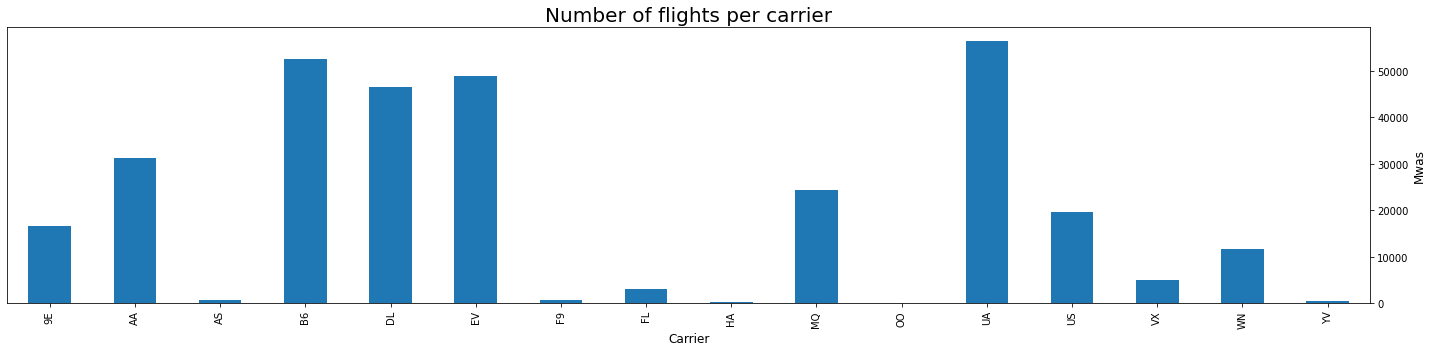

In [21]:
"""Number of Flights Per Carrier"""

flights_by_carrier = flights_data.groupby("carrier").size()
ax = flights_by_carrier.plot.bar()
fig = plt.gcf()
fig.set_size_inches(20, 5)
ax.set_title('Number of flights per carrier', fontsize=20)
ax.set_xlabel("Carrier", fontsize=12)
ax.set_ylabel("Mwas", fontsize=12)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
fig.tight_layout()



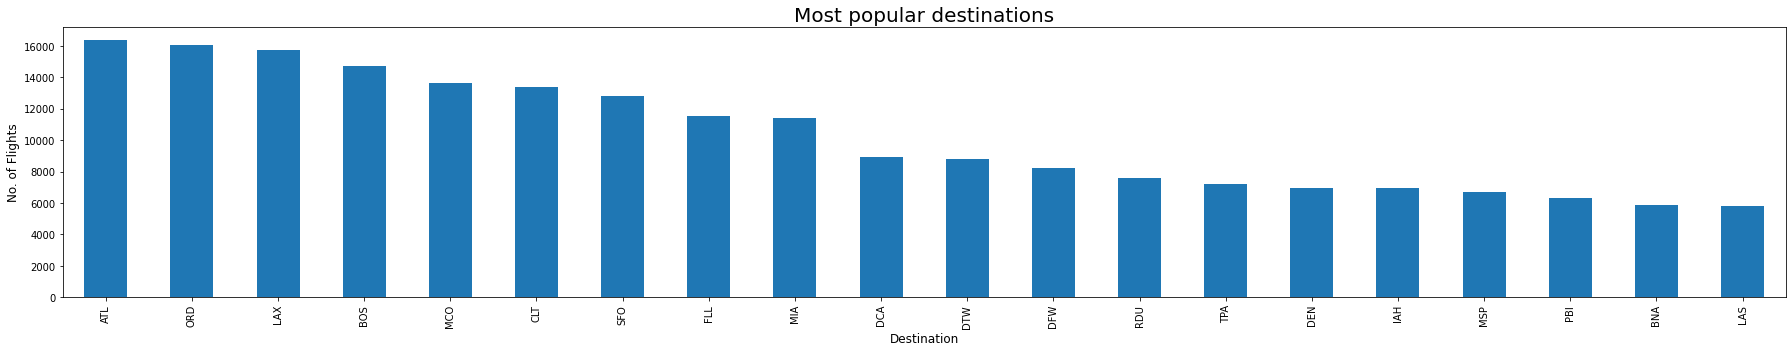

In [8]:
"""20 Most popular destinations"""
flights_by_dest = flights_data.groupby("dest").size().sort_values(ascending=False)[:20]
ax = flights_by_dest.plot.bar()
fig = plt.gcf()
fig.set_size_inches(25,5)
ax.set_title('Most popular destinations', fontsize=20)
ax.set_xlabel("Destination", fontsize=12)
ax.set_ylabel("No. of Flights", fontsize=12)
fig.tight_layout()



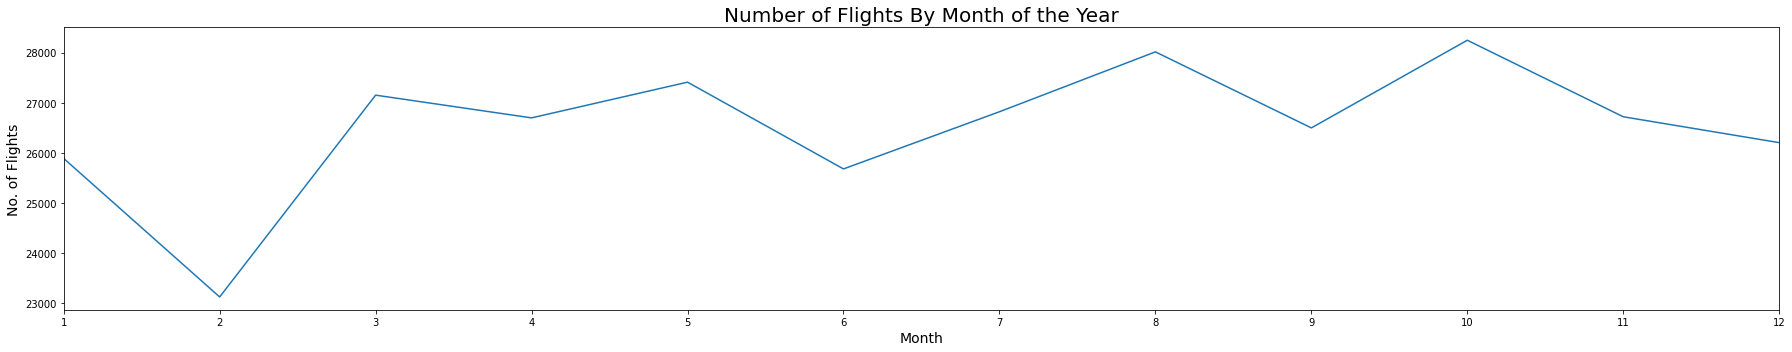

In [34]:
"""Flights By Month"""
flights_by_month = flights_data.groupby("month").size()
ax = flights_by_month.plot.line()
fig = plt.gcf()
fig.set_size_inches(25,5)
ax.set_title('Number of Flights By Month of the Year', fontsize=20)
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("No. of Flights", fontsize=14)
ax.set(xlim=(min(flights_by_month.index),  max(flights_by_month.index)), xticks=flights_by_month.index)
fig.tight_layout()


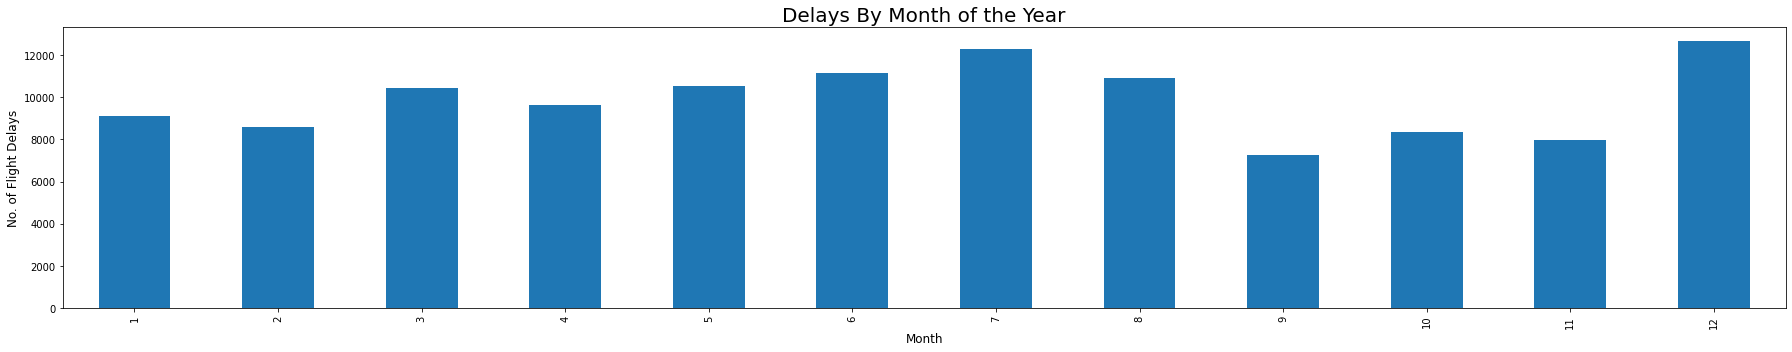

In [10]:
"""Number of Departure Delays By Month"""
delays_by_month = flights_data[flights_data["dep_delay"] > 0].groupby("month").size()
ax = delays_by_month.plot.bar()
fig = plt.gcf()
fig.set_size_inches(25,5)
ax.set_title('Delays By Month of the Year', fontsize=20)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("No. of Flight Delays", fontsize=12)
fig.tight_layout()

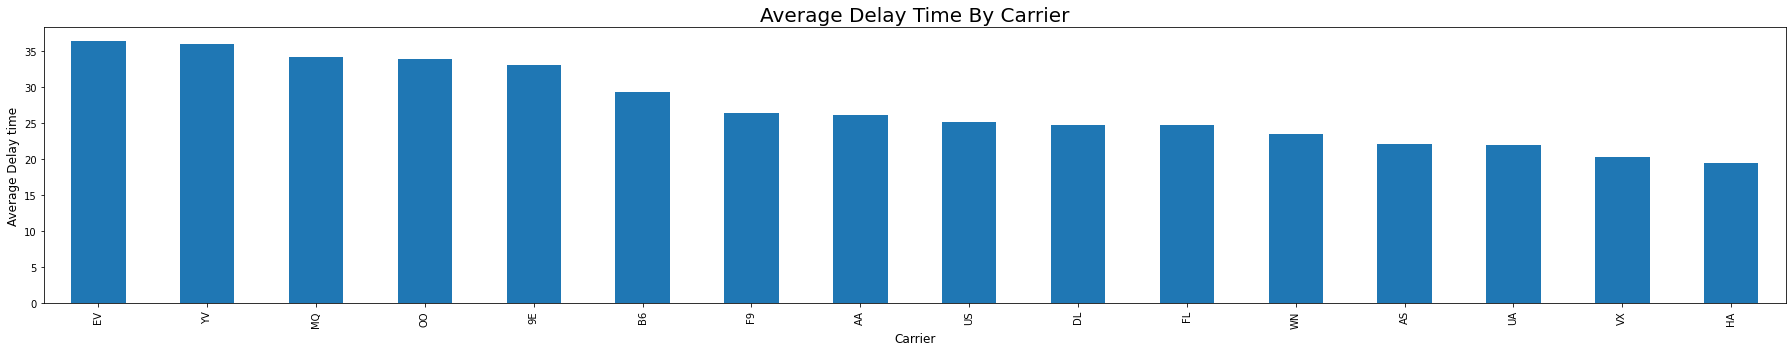

In [30]:
"""Average Delay time by Carrier"""
delays_by_carrier = flights_data[flights_data["dep_delay"] > 0].groupby("carrier")["dep_delay"].mean().sort_values(ascending=False)
ax = delays_by_carrier.plot.bar()
fig = plt.gcf()
fig.set_size_inches(25,5)
ax.set_title('Average Delay Time By Carrier', fontsize=20)
ax.set_xlabel("Carrier", fontsize=12)
ax.set_ylabel("Average Delay time", fontsize=12)
fig.tight_layout()